In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/house_prices.csv')

In [ ]:
df.head()

,Area (sq ft),Bedrooms,Bathrooms,Location_Score,Price
0,850.0,2.0,1.0,4.0,180000.0
1,1200.0,3.0,2.0,6.0,275000.0
2,650.0,1.0,1.0,NaN,125000.0
3,2000.0,4.0,3.0,8.0,NaN
4,NaN,3.0,2.0,7.0,320000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area (sq ft)    18 non-null     float64
 1   Bedrooms        19 non-null     float64
 2   Bathrooms       18 non-null     float64
 3   Location_Score  17 non-null     float64
 4   Price           18 non-null     float64
dtypes: float64(5)
memory usage: 932.0 bytes


In [ ]:
df.tail()

,Area (sq ft),Bedrooms,Bathrooms,Location_Score,Price
15,1600.0,3.0,2.0,7.0,340000.0
16,2200.0,4.0,3.0,NaN,520000.0
17,1250.0,3.0,2.0,6.0,275000.0
18,800.0,2.0,1.0,3.0,NaN
19,2500.0,4.0,3.0,9.0,600000.0


In [ ]:
df.describe()

,Area (sq ft),Bedrooms,Bathrooms,Location_Score,Price
count,18.000000,19.000000,18.000000,17.000000,18.000000
mean,1544.444444,3.105263,2.166667,6.470588,367777.777778
std,749.291604,1.242521,0.985184,2.294495,205076.902521
min,650.000000,1.000000,1.000000,2.000000,115000.000000
25%,912.500000,2.000000,1.250000,5.000000,212500.000000
50%,1275.000000,3.000000,2.000000,7.000000,305000.000000
75%,2150.000000,4.000000,3.000000,8.000000,495000.000000
max,3000.000000,5.000000,4.000000,10.000000,800000.000000


In [ ]:
df.isnull().sum()

,0
Area (sq ft),2
Bedrooms,1
Bathrooms,2
Location_Score,3
Price,2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

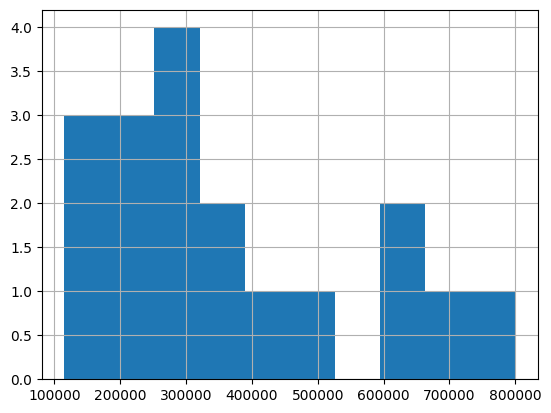

In [ ]:
df['Price'].hist()


<Axes: xlabel='Area (sq ft)', ylabel='Price'>

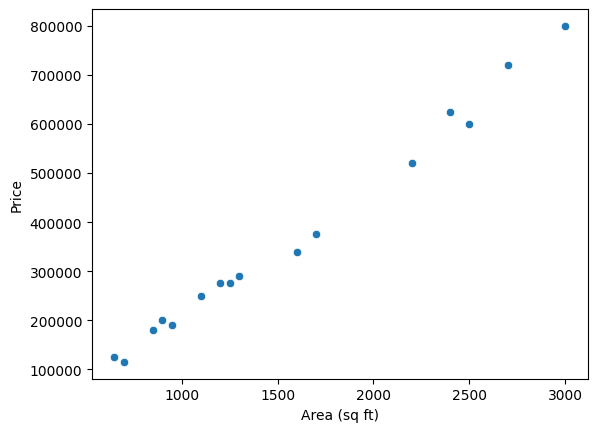

In [ ]:
sns.scatterplot(x='Area (sq ft)',y='Price',data=df)

<Axes: >

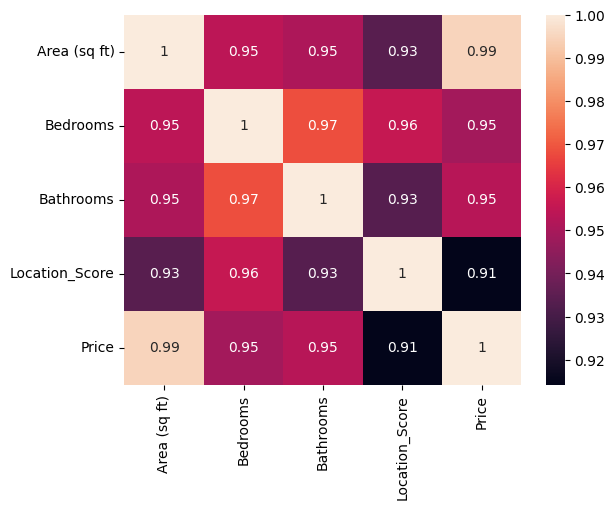

In [ ]:
dfr=df.corr()
sns.heatmap(dfr,annot=True)

<Axes: xlabel='Location_Score', ylabel='Price'>

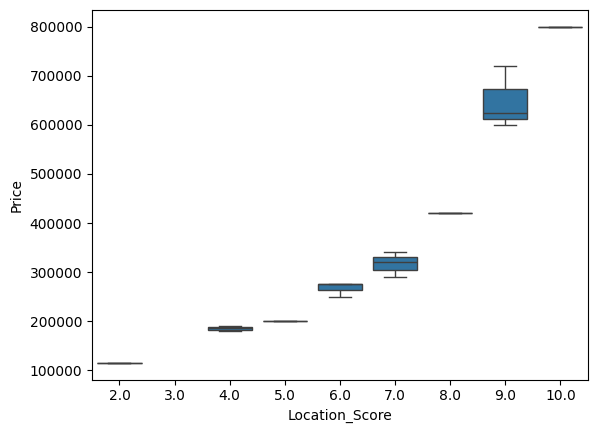

In [ ]:
sns.boxplot(x='Location_Score',y='Price',data=df)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df['Expensive']=(df['Price']>df['Price'].mean()).astype(int)

In [ ]:
x = df.drop('Price',axis=1)

In [ ]:
Y = df['Expensive']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.2,random_state=32)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
for col in x_train.columns:
    if x_train[col].isnull().any():
        mean_val = x_train[col].mean()
        x_train[col] = x_train[col].fillna(mean_val)
        x_test[col] = x_test[col].fillna(mean_val)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
import

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.75

Confusion Matrix:
 [[2 0]
 [1 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [ ]:
import pandas as pd

#example
new_data_values = [1500, 3, 2, 1, 1]
feature_columns = ['Area (sq ft)', 'Bedrooms', 'Bathrooms', 'Location_Score', 'Expensive']

new_data_df = pd.DataFrame([new_data_values], columns=feature_columns)

prediction = model.predict(new_data_df)

if prediction[0] == 1:
    print("This house is EXPENSIVE")
else:
    print("This house is NOT expensive")

This house is EXPENSIVE


In [ ]:
#example2
new_data_values = [1000, 2, 1, 2, 2]
feature_columns = ['Area (sq ft)', 'Bedrooms', 'Bathrooms', 'Location_Score', 'Expensive']

new_data_df = pd.DataFrame([new_data_values], columns=feature_columns)

prediction = model.predict(new_data_df)

if prediction[0] == 1:
    print("This house is EXPENSIVE")
else:
    print("This house is NOT expensive")

This house is NOT expensive
